# ELDEN RING WEAPONS STATS EDA

# INTRODUCTION:
Elden Ring is a brand new product of FromSoftware with the guidance of Hidetaka Miyazaki and George Marin, the author of the famous fantasy series "A Song of Fire and Ice." As following the series of Soul-style, Elden Ring is an action game with an exciting open-world adventure. It has passed 12 million sales in just the first three weeks and has become one of the best games on many review pages.

# THE GOAL:
There are around 300 weapons we can get in the game. With the database, we aim to analyze the Attack,Guard, and Scaling attributes.

# NOTE:
After checking the wikia of Elden Ring, I found that the data is based on the max-upgraded weapons attributes.

### Let's setup:

In [8]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


In [9]:
# Setup figure
sns.set_style('whitegrid')
clmap = 'flare'

In [10]:
# Functions:
def lst_unique(list1,srt = False):
    list_set = set(list1)
    unique_list = (list(list_set))
    if srt:
        unique_list.sort()
    return unique_list
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
def infoOut(data,details=False,vunique=False,srt=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Is-Null Count'] = data.isnull().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if vunique:
        dfInfo['Unique'] = np.nan
        Unique_col = dfInfo.columns.get_loc('Unique')
        for i in range(0,len(data.columns)):
            Va_unique = lst_unique(data.T.values[i],srt)
            Va_listToStr = ' '.join([str(elem) for elem in Va_unique])
            dfInfo.iloc[i,Unique_col] = Va_listToStr
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [11]:
# Import data
df = pd.read_csv('elden_ring_weapon.csv')

First look:

In [12]:
# Replace name/ First look:
df.columns = df.columns.str.replace('.1','_Guard')
cl = df.columns
print('Data: ----------------------------------------------------------------\n')
display(df.head(5))
print('Index: ----------------------------------------------------------------\n')
display(cl)
print('Data Info: ----------------------------------------------------------------\n')
display(infoOut(df,vunique=True,srt=True))

Data: ----------------------------------------------------------------



,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Any,Phy_Guard,Mag_Guard,Fir_Guard,Lit_Guard,Hol_Guard,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


Index: ----------------------------------------------------------------



Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy_Guard', 'Mag_Guard',
       'Fir_Guard', 'Lit_Guard', 'Hol_Guard', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

Data Info: ----------------------------------------------------------------



,Column,Non-Null Count,Is-Null Count,Dtype,Unique
0,Name,307,0,object,Academy Glintstone Staff Alabaster Lord's Swor...
1,Type,307,0,object,Axe Ballista Bow Claw Colossal Sword Colossal ...
2,Phy,307,0,object,- 102 112 122 124 132 137 139 142 146 147 149 ...
3,Mag,307,0,object,- 129 137 139 147 149 156 161 166 173 175 176 ...
4,Fir,307,0,object,- 110 129 137 139 151 161 169 176 181 186 188 ...
5,Lit,307,0,object,- 129 144 154 191
6,Hol,307,0,object,- 105 122 151 159 161 166 169 178 183 186 188 ...
7,Cri,307,0,int64,100 110 115 124 130 140
8,Sta,307,0,int64,38 40 42 46 56 60 62 64 66 68 72 76 78 80 82 8...
9,Str,307,0,object,- A B C D E S


### Columns:

##### Weapon info:

* Name - name of weapon
* Type - type of weapon

##### Weapon attack attributes:

* Phy - physical damage
* Mag - magical damage
* Fir - fire damage
* Lit - light damage
* Hol - holy damage
* Cri - critical damage
* Sta - stamina usage

##### Weapon scaling attributes:

* Str - strength scaling
* Dex - dexterity scaling
* Int - intelligence scaling
* Fai - faith scaling
* Arc - arcane scaling
* Any - special effect damage

##### Weapon guard attributes:

* Phy_Guard - physical blocking damage
* Mag_Guard - magical blocking damage
* Fir_Guard - fire blocking damage
* Lit_Guard - light blocking damage
* Hol_Guard - holy blocking damage
* Bst - Guard boost

##### Others:

* Rst - rest
* Wgt - weight of weapon
* Upgrade - which stone should be used to upgrade the weapon

Most of columns show no null values but "-" value. I count this value as null.

Let's look at the null-value distribution in the data

Percentage of null: ----------------------------------


,Name,Percent
0,Name,0.000000
1,Type,0.000000
2,Phy,0.651466
3,Mag,87.947883
4,Fir,93.159609
5,Lit,98.697068
6,Hol,89.576547
7,Cri,0.000000
8,Sta,0.000000
9,Str,5.211726


Map of null: ----------------------------------


Text(0.5, 1.0, 'Heatmap of null values')

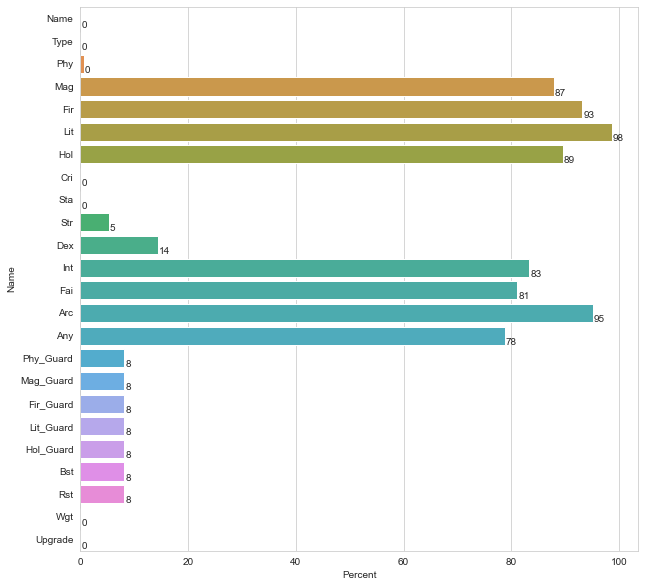

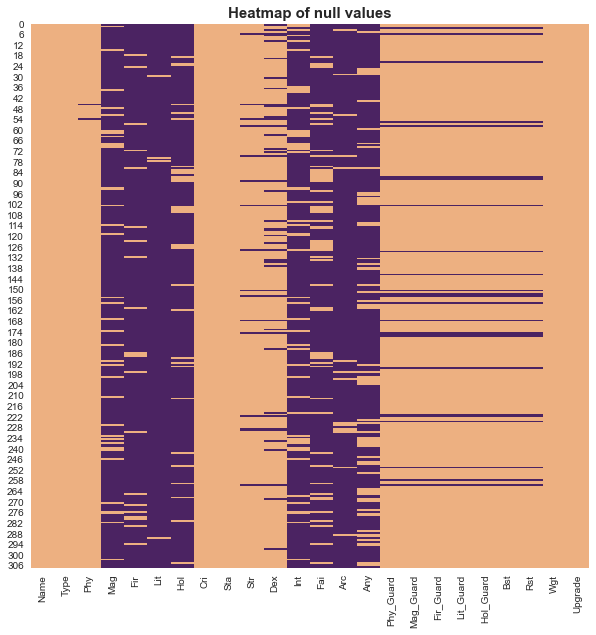

In [13]:
for col in df.columns:
    df[col].replace({'-':np.nan},inplace=True)
print('Percentage of null: ----------------------------------')
null_per = df.isnull().sum()*100/len(df)
null_per = null_per.to_frame()
null_per.columns = ['Percent']
null_per.index.names = ['Name']
null_per.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Percent',y='Name',data=null_per)
show_values_on_bars(axs=ax,h_v='h',space = 0.2)
print('Map of null: ----------------------------------')
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap=clmap)
plt.title('Heatmap of null values',fontsize=15,fontweight='bold')

Most of weapons have no special elements as Magic, Fire, Light, and Holy. However, there are a large number of weapons which have its guard against the Magics.

Let's look at the category of weapon.

This weapon types figures was after the figure of L3LLFF.
Thank you very much for your job.

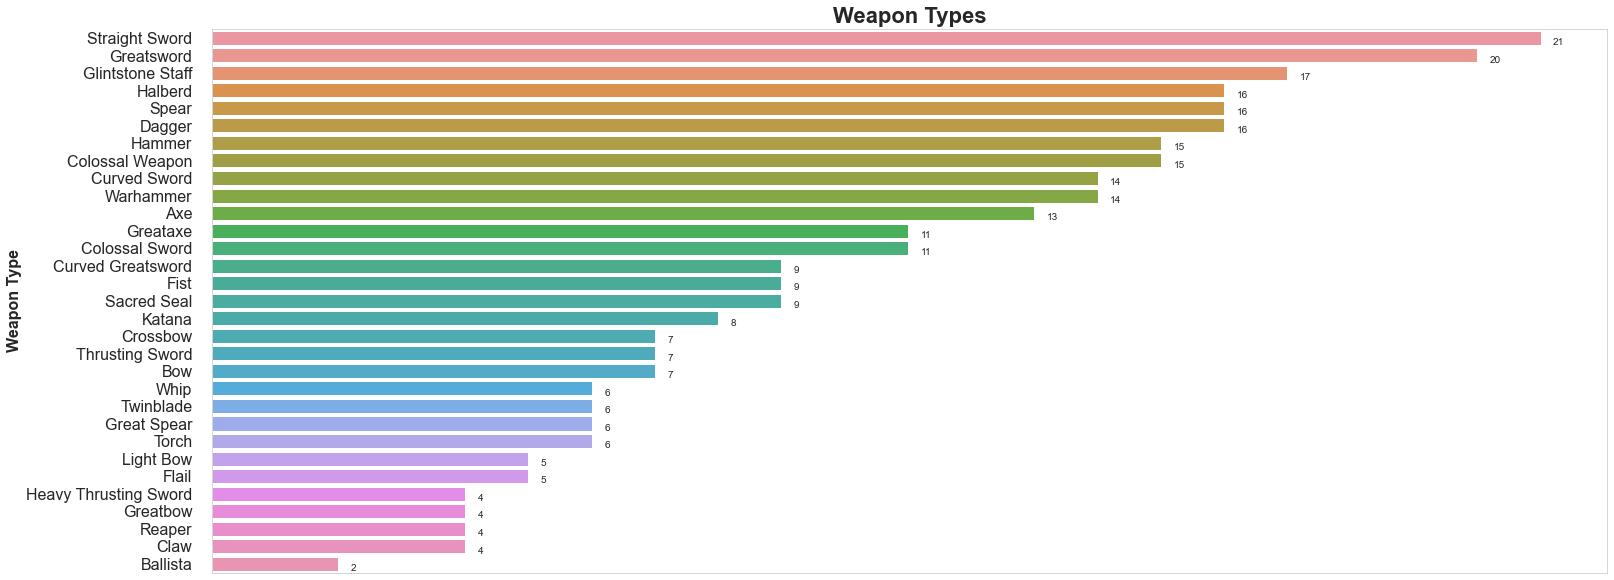

In [14]:
# Plot Weapon Types
fig,ax = plt.subplots(figsize = (25,10))
plt.title("Weapon Types",size = 22,weight = 'bold')

sns.barplot(data = df['Type'].value_counts().reset_index(),x = 'Type',y='index')
sns.set_style("whitegrid")
plt.ylabel("Weapon Type", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)
show_values_on_bars(axs=ax,h_v='h',space = 0.2)

Let's have a look from other aspects of this

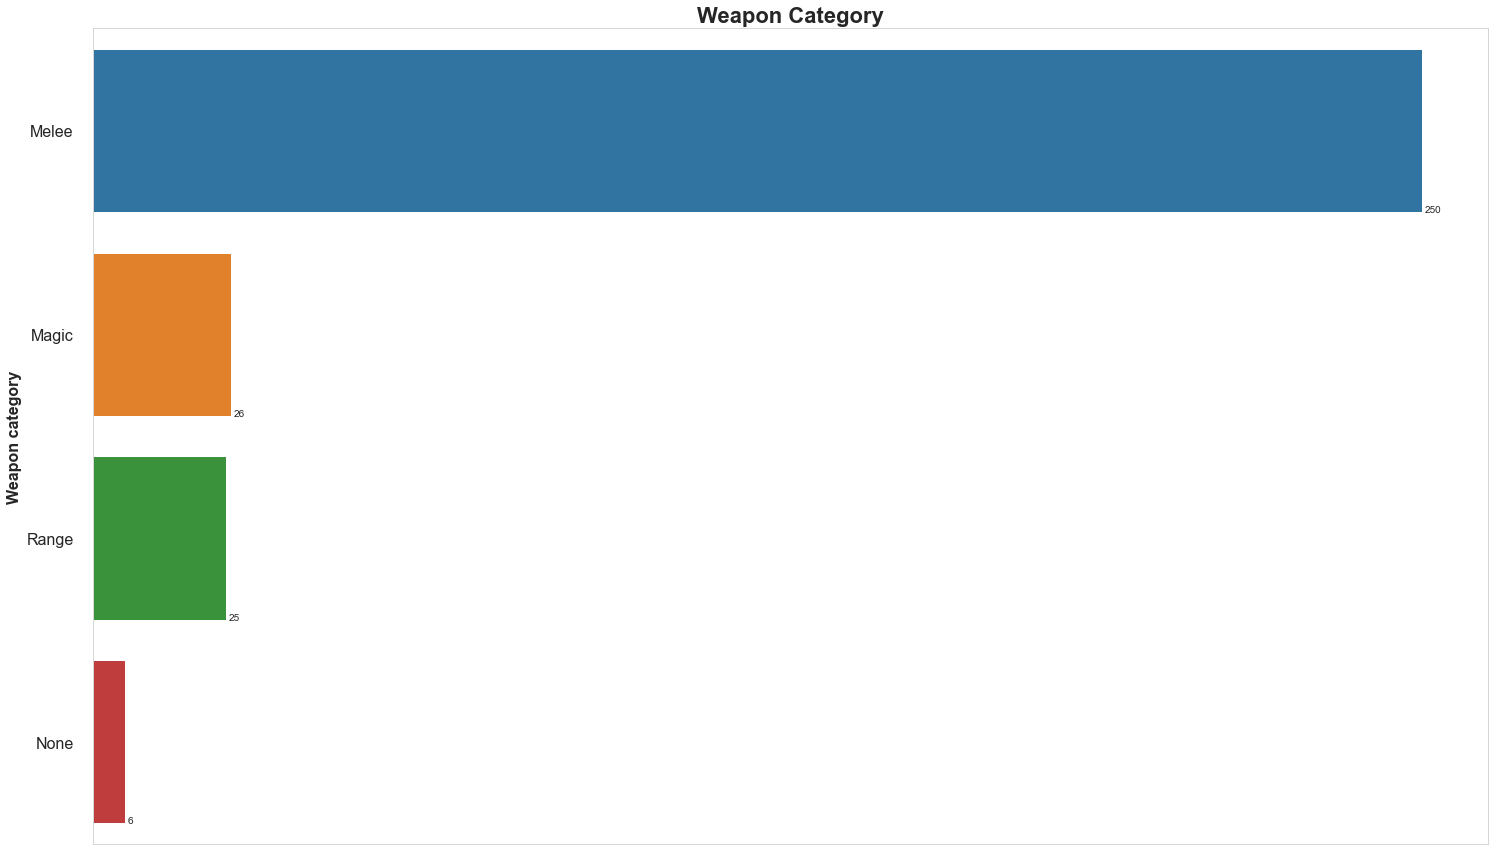

In [15]:
da = df.iloc[:,:]

melee_wea = ['Axe','Claw','Colossal Sword','Curved Greatsword','Curved Sword','Dagger','Fist','Greatsword','Great Spear','Greataxe','Halberd','Hammer','Heavy Thrusting Sword','Katana','Reaper','Twinblade','Warhammer','Whip','Colossal Weapon','Flail','Spear','Straight Sword','Thrusting Sword']
range_wea = ['Ballista','Bow','Crossbow','Greatbow','Light Bow',]
magic_wea = ['Glintstone Staff','Sacred Seal']

da['category'] = ["Melee" if ele in melee_wea else "Range" if ele in range_wea else "Magic" if ele in magic_wea else "None" for ele in da['Type']]

fig,ax = plt.subplots(figsize = (25,15))
plt.title("Weapon Category",size = 22,weight = 'bold')

sns.barplot(data = df['category'].value_counts().reset_index(),x = 'category',y='index')
sns.set_style("whitegrid")
plt.ylabel("Weapon category", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)
show_values_on_bars(axs=ax,h_v='h',space = 0.5)

In [16]:
da[da['category']=='None']

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,...,Phy_Guard,Mag_Guard,Fir_Guard,Lit_Guard,Hol_Guard,Bst,Rst,Wgt,Upgrade,category
17,Beast-Repellent Torch,Torch,142,NaN,254,NaN,NaN,100,94,B,...,23,17,28,17,17,22,14,2.5,Smithing Stones,None
113,Ghostflame Torch,Torch,122,220,NaN,NaN,NaN,100,104,D,...,21,42,13,13,13,22,14,2.5,Smithing Stones,None
249,Sentry's Torch,Torch,137,NaN,NaN,NaN,245,100,120,D,...,30,21,21,21,36,22,18,5.0,Somber Smithing Stones,None
265,St. Trina's Torch,Torch,124,NaN,222,NaN,NaN,100,104,D,...,25,15,40,15,15,20,15,3.0,Somber Smithing Stones,None
271,Steel-Wire Torch,Torch,149,NaN,267,NaN,NaN,100,104,D,...,25,18,30,18,18,22,15,3.0,Smithing Stones,None
278,Torch,Torch,132,NaN,237,NaN,NaN,100,84,C,...,21,15,25,15,15,22,12,1.5,Smithing Stones,None


There are 250 over 307 (around 81%) as melee weapon, and following are Magic and Range weapons.
The less weapons are Torch type.

Let me solve the null values first.

In [17]:
cols = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta','Phy_Guard', 'Mag_Guard',
       'Fir_Guard', 'Lit_Guard', 'Hol_Guard', 'Bst', 'Rst']
for col in cols:
        df[col].fillna(0,inplace=True)

In [18]:
for col in cols:
    df[col] = df[col].astype('str').astype('int')

<AxesSubplot:>

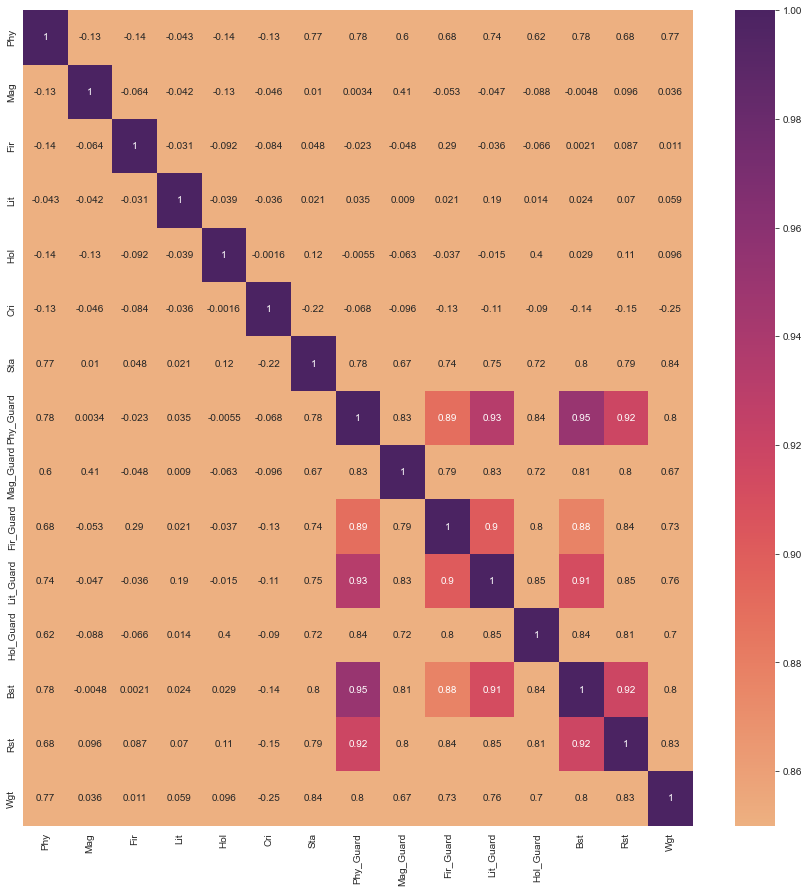

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'),cbar=True,cmap=clmap,annot=True,vmin=0.85,vmax=1)

The heatmap shows on Guard-side that the Phy_Guard, Fir_Guard, Lit_Guard, Bst, and Wgt are in positive correlation.
The rest attributes only have correlation with Phy_Guard and Bst.

So it seems the more heavy the weapon is, the better you should have your physical guard up with it.

Let's see those most weapons with high rest rate

In [42]:
display(df[df["Type"].isin(["Bow","Greatbow","Glintstone Staff"])].loc[:,["Name","Type","Rst","Wgt"]].sort_values("Rst").head(5))
display(df[df["Rst"] >= 25].loc[:,["Name","Type","Rst","Wgt"]].sort_values("Rst").head(5))

,Name,Type,Rst,Wgt
87,Erdtree Greatbow,Greatbow,0,11.0
86,Erdtree Bow,Bow,0,4.0
157,Horn Bow,Bow,0,4.5
175,Lion Greatbow,Greatbow,0,9.5
176,Longbow,Bow,0,4.0


,Name,Type,Rst,Wgt
7,Axe of Godfrey,Colossal Weapon,25,18.0
282,Troll's Golden Sword,Colossal Sword,25,19.0
281,Troll Knight's Sword,Colossal Sword,25,18.0
238,Rotten Staff,Colossal Weapon,25,18.0
129,Golem's Halberd,Colossal Weapon,25,21.5


After looking up for Rst info, I found nothing about it.

However, I think Rst should mean the resting after you swing your weapon as you would take less time, even notime, to swing a light weapon, and vice versa. In addtion, you can not swing a bow so the Rst should be 0.

<AxesSubplot:title={'center':'Twinblade'}>

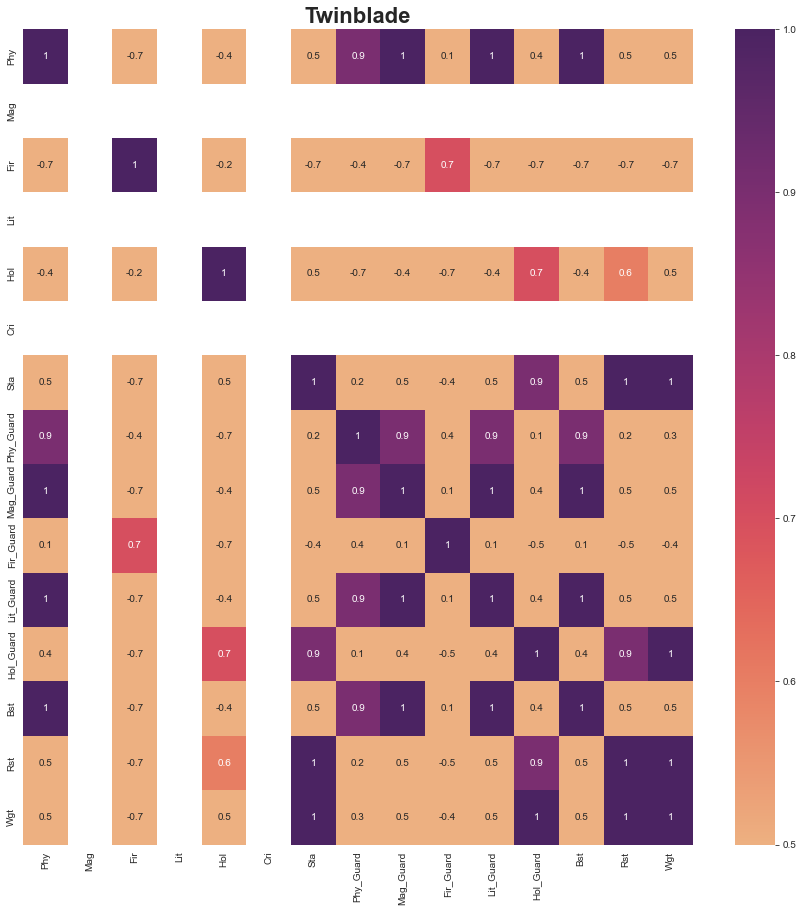

In [31]:
fig,ax = plt.subplots(figsize = (15,15))
plt.title("Twinblade",size = 22,weight = 'bold')
da = df[df['Type']=='Twinblade'].iloc[:,:]
sns.heatmap(da.corr(method='spearman').round(1),cbar=True,cmap=clmap,annot=True,vmin=0.5,vmax=1)

In [79]:
display(df[df["Type"].isin(["Twinblade"])].loc[:,["Name","Type","Phy","Rst","Wgt"]].sort_values("Rst"))

df_ave = df[df["Type"].isin(["Twinblade"])].mean().round(1)

cols = ['Phy','Cri', 'Sta','Bst', 'Rst','Wgt']

display("Twin blades attributes ------------------------------------------")
for col in cols:
    display('{} range: {} to {}'.format(str(col),df[col].min(),df[col].max()))
    display('TB {}_average: {}, about {} %'.format(str(col),df_ave[col],round(df_ave[col]*100/df[col].max(),1)))

,Name,Type,Phy,Rst,Wgt
81,Eleonora's Poleblade,Twinblade,176,14,6.0
120,Godskin Peeler,Twinblade,296,15,8.0
284,Twinblade,Twinblade,291,15,7.0
285,Twinned Knight Swords,Twinblade,298,15,8.0
104,Gargoyle's Black Blades,Twinblade,198,16,8.5
110,Gargoyle's Twinblade,Twinblade,301,16,8.5


'Twin blades attributes ------------------------------------------'

'Phy range: 0 to 672'

'TB Phy_average: 260.0, about 38.7 %'

'Cri range: 100 to 140'

'TB Cri_average: 100.0, about 71.4 %'

'Sta range: 38 to 224'

'TB Sta_average: 93.0, about 41.5 %'

'Bst range: 0 to 69'

'TB Bst_average: 34.7, about 50.3 %'

'Rst range: 0 to 29'

'TB Rst_average: 15.2, about 52.4 %'

'Wgt range: 0.0 to 26.5'

'TB Wgt_average: 7.7, about 29.1 %'

Twin blades are weapons which has good attributes relation in Physic, Physic Guard, Magic - Light Guard, but not really good at defending against Fire - Holy magic.

Twin blades are not good Physical DMG weapons as its low Phy and high Rst, however, its remarkable high Crit and low Wgt can count it as a good choice for those love play Crit build.